importación de librerias necesarias: 

In [2]:
import pandas as pd

lectura de archivo:

In [3]:
df_business = pd.read_parquet(r'y-business.parquet')

In [4]:
df_business.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,None,93101,34.426679,-119.711197,5.0,7,0,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,None,63123,38.551126,-90.335695,3.0,15,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Shipping Centers, Local Services, Notaries, Ma...","{'Friday': '8:0-18:30', 'Monday': '0:0-0:0', '..."


visualización de columna categories

In [5]:
df_business['categories'].head()

0    Doctors, Traditional Chinese Medicine, Naturop...
1    Shipping Centers, Local Services, Notaries, Ma...
2    Department Stores, Shopping, Fashion, Home & G...
3    Restaurants, Food, Bubble Tea, Coffee & Tea, B...
4                            Brewpubs, Breweries, Food
Name: categories, dtype: object

In [6]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150351 entries, 0 to 1543
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150351 non-null  object 
 1   name          150351 non-null  object 
 2   address       150351 non-null  object 
 3   city          150351 non-null  object 
 4   state         150348 non-null  object 
 5   postal_code   150351 non-null  object 
 6   latitude      150351 non-null  float64
 7   longitude     150351 non-null  float64
 8   stars         150351 non-null  float64
 9   review_count  150351 non-null  int64  
 10  is_open       150351 non-null  int64  
 11  attributes    136607 non-null  object 
 12  categories    150248 non-null  object 
 13  hours         127128 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 17.2+ MB


In [7]:
df_business['categories'].value_counts()

categories
Beauty & Spas, Nail Salons                                                                                       1012
Restaurants, Pizza                                                                                                935
Nail Salons, Beauty & Spas                                                                                        934
Pizza, Restaurants                                                                                                823
Restaurants, Mexican                                                                                              728
                                                                                                                 ... 
Dermatologists, Health & Medical, Cosmetic Surgeons, Doctors, Acne Treatment, Skin Care, Beauty & Spas              1
Home Services, Home & Garden, Nurseries & Gardening, Hardware Stores, Shopping, Building Supplies, Appliances       1
Food Trucks, Smokehouse, Restaurants, Food, B

In [8]:
filtro_comida = df_business['categories'].str.contains('Restaurants|Food|Steak|Smokehouse|Pizza|Barbeque', case=False, na=False)

In [9]:
df_comida = df_business[filtro_comida]

In [10]:
df_comida.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Friday': '7:0-21:0', 'Monday': '7:0-20:0', '..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Brewpubs, Breweries, Food","{'Friday': '12:0-22:0', 'Monday': None, 'Satur..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,AZ,37015,36.269593,-87.058943,2.0,6,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Friday': '9:0-0:0', 'Monday': '0:0-0:0', 'Sa..."
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,TN,63123,38.565165,-90.321087,3.0,19,0,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Pubs, Restaurants, Italian, Bars, American (Tr...",None
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,MO,37207,36.208102,-86.768170,1.5,10,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Friday': '6:0-16:0', 'Monday': '0:0-0:0', 'S..."


creación de nube de palabras para ver las mas relevantes del dataset

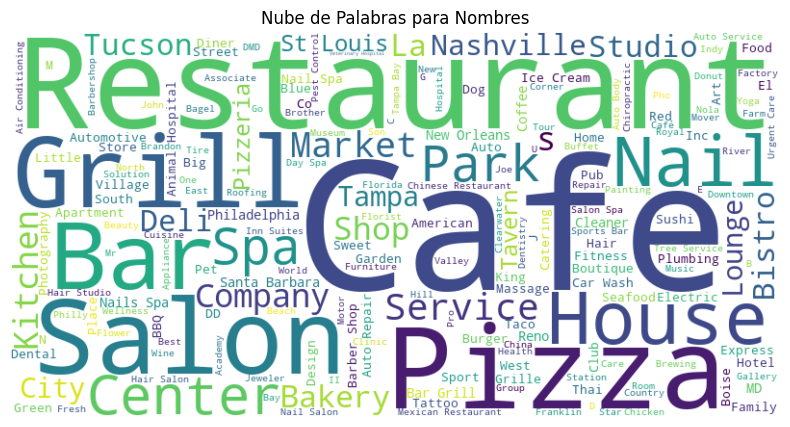

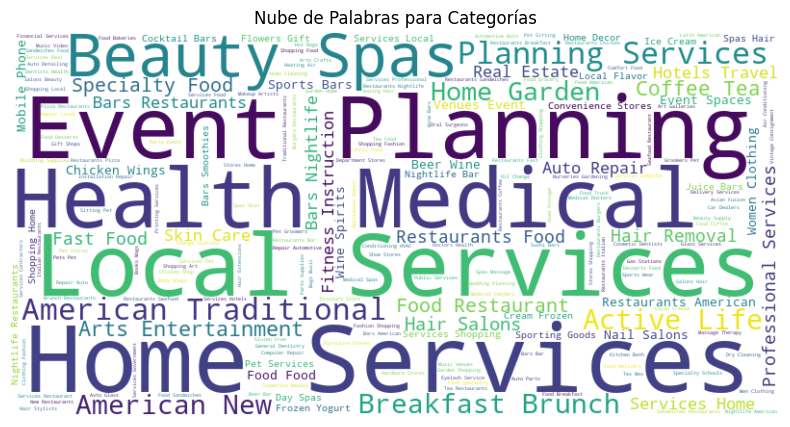

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_names = ' '.join(df_business['name'].dropna().unique())  # Usamos unique() para evitar repetir el mismo nombre
wordcloud_names = WordCloud(width=800, height=400, background_color='white').generate(text_names)

# Mostrar la nube de palabras para 'name'
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_names, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras para Nombres')
plt.show()

# Generar una nube de palabras para la columna 'categories'
text_categories = ' '.join(df_business['categories'].dropna().unique())  # Usamos unique() para evitar repetir la misma categoría
wordcloud_categories = WordCloud(width=800, height=400, background_color='white').generate(text_categories)

# Mostrar la nube de palabras para 'categories'
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_categories, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras para Categorías')
plt.show()

Observamos que una de las palabras mas relevantes en el dataset es Restaurant, por lo cual, decidimos tomar este rubro para nuestro objetivo. 

Buscamos aparición de palabras consideradas clave para nuestro analisis y enfoque

In [12]:
# Contar las apariciones de 'steak' en 'categories'
steak_count_categories = df_business['categories'].str.contains('steak', case=False, na=False).sum()

# Contar las apariciones de 'smoke' en 'categories'
smoke_count_categories = df_business['categories'].str.contains('smoke', case=False, na=False).sum()

Barbeque_count_categories = df_business['categories'].str.contains('Barbeque', case=False, na=False).sum()
# grill , bistro

grill_count_categories = df_business['categories'].str.contains('grill', case=False, na=False).sum()

print(f"'Steak' aparece {steak_count_categories} veces en 'categories'.")
print(f"'smoke' aparece {smoke_count_categories} veces en 'categories'.")
print(f"'Barbeque' aparece {Barbeque_count_categories} veces en 'categories'.")
print(f"'grill' aparece {grill_count_categories} veces en 'categories'.")

'Steak' aparece 2080 veces en 'categories'.
'smoke' aparece 75 veces en 'categories'.
'Barbeque' aparece 1694 veces en 'categories'.
'grill' aparece 47 veces en 'categories'.


In [13]:
# Contar las apariciones de 'steak' en 'name'
steak_count_name = df_business['name'].str.contains('steak', case=False, na=False).sum()

# Contar las apariciones de 'smoke' en 'name'
smoke_count_name = df_business['name'].str.contains('smoke', case=False, na=False).sum()

Barbeque_count_name = df_business['name'].str.contains('Barbeque', case=False, na=False).sum()

grill_count_name = df_business['name'].str.contains('grill', case=False, na=False).sum()

print(f"'steak' aparece {steak_count_name} veces en 'name'.")
print(f"'smoke' aparece {smoke_count_name} veces en 'name'.")
print(f"'Barbeque' aparece {Barbeque_count_name} veces en 'name'.")
print(f"'grill' aparece {grill_count_name} veces en 'name'.")

'steak' aparece 910 veces en 'name'.
'smoke' aparece 333 veces en 'name'.
'Barbeque' aparece 51 veces en 'name'.
'grill' aparece 3407 veces en 'name'.


analizamos tipo de dato que contiene la columna attrubutes

In [14]:
type(df_business['attributes'][0])

dict

In [15]:
df_business.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')